# Analysing: Characteristic IV curve of a RF generated magnetized plasma in low pressure

## Theory of probes

Langmuir or electrostatics probres are pertubatives electrodes inserted in plasmas to measure some propeties like Electronic temperature (T_e), Electron Number Density (N_e), Plasma Potential (V_p) and flutuant potential 


There's tree or for regions of interest in this type of curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

pd.set_option('display.precision', 10)
plt.rcParams["text.usetex"] = True

In [3]:
### IMPORT DOS DATA FRAMES
df_ref = pd.read_csv(r"C:\Users\Sinesio-PC\Desktop\28.06\ref9.csv",dtype = "float64") ### Referência de corrente 
df_data = pd.read_csv(r"C:\Users\Sinesio-PC\Desktop\Wenner\William\Experimento\09.09\pot\1w0.csv", dtype = "float64") ###

### Analisando primeira medida
df_ref["I"] = df_ref["CH2(V)"]/47e3
df_data["I"] = df_data["CH2(V)"]/47e3
# Mostrando os dataframes

df_data.head(),df_ref.head()

(   Time(s)    CH1(V)   CH2(V)             I
 0    -0.05 -19.03110  0.46058  0.0000097996
 1    -0.05 -21.40999  0.46058  0.0000097996
 2    -0.05 -19.03110  0.46058  0.0000097996
 3    -0.05 -19.03110  0.46058  0.0000097996
 4    -0.05 -19.03110  0.46058  0.0000097996,
    Time(s)    CH1(V)   CH2(V)             I
 0    -0.05 -20.74216 -2.41059 -0.0000512891
 1    -0.05 -21.64399 -2.41059 -0.0000512891
 2    -0.05 -21.64399 -2.41059 -0.0000512891
 3    -0.05 -21.64399  0.00000  0.0000000000
 4    -0.05 -21.64399 -2.41059 -0.0000512891)

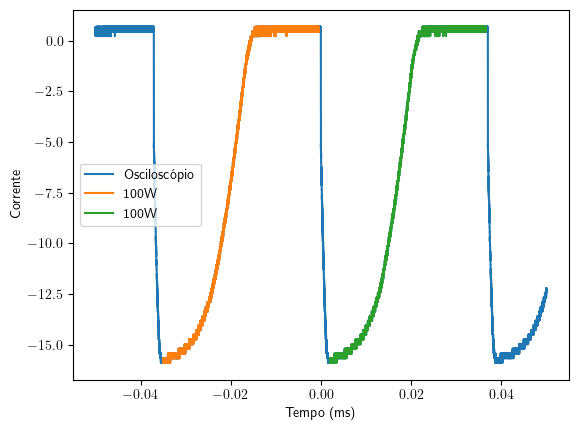

In [4]:
## Selecionando intervalo de medida.
df_curve_data = df_data.iloc[150000:495000]
df_curve_data2 = df_data.iloc[520000:865000]
## Visualização do osciloscópio (V x T)
plt.plot(df_data["Time(s)"],df_data["CH2(V)"], label = "Osciloscópio")
plt.plot(df_curve_data["Time(s)"],df_curve_data["CH2(V)"], label = "100W")
plt.plot(df_curve_data2["Time(s)"],df_curve_data2["CH2(V)"], label = "100W")
plt.xlabel("Tempo (ms)")
plt.ylabel("Corrente")
plt.legend()
plt.show()

In [5]:
df_curve = df_curve_data.copy()
df_second_curve = df_curve_data2.copy()

In [6]:
#### Checando se a ref e a curva estão com o mesmo numero de pontos
len(df_curve), len(df_second_curve)

### Fazendo correção

#df_curve["I_compesated"] = (df_curve["I"]-df_ref["I"])*-1
df_curve["I_compesated"] = (df_curve["I"])*-1
df_second_curve["I_compesated"] =(df_second_curve["I"])*-1

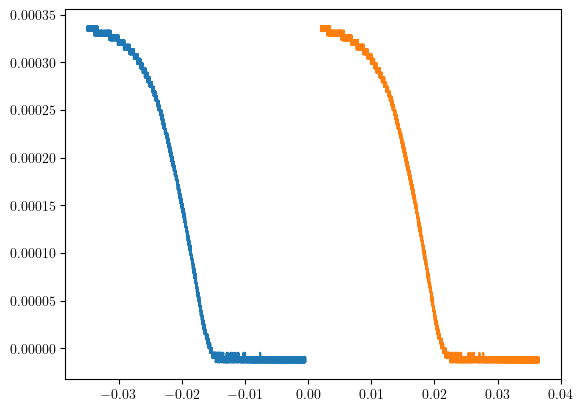

In [7]:
plt.plot(df_curve["Time(s)"],df_curve["I_compesated"])
plt.plot(df_second_curve["Time(s)"],df_second_curve["I_compesated"])
plt.show()

In [8]:
### Definindo arrays para executar a filtragem
tempo = df_curve['Time(s)'].values
tensao = df_curve['CH1(V)'].values
corrente = df_curve['I_compesated'].values
tempo_dois = df_second_curve['Time(s)'].values
tensao_dois = df_second_curve['CH1(V)'].values
corrente_dois =  df_second_curve['I_compesated'].values

In [9]:
df_curve["I_smooth"] = sp.signal.savgol_filter(corrente, int(len(corrente)*0.3),2 ,mode = 'nearest')
df_curve["V_smooth"] = sp.signal.savgol_filter(tensao, int(len(tensao)*0.3),2 ,mode = 'nearest')
df_second_curve["I_smooth"] = sp.signal.savgol_filter(corrente_dois, int(len(corrente_dois)*0.3),2 ,mode = 'nearest')
df_second_curve["V_smooth"] = sp.signal.savgol_filter(tensao_dois, int(len(tensao_dois*0.3)),2 ,mode = 'nearest')

In [10]:
di = sp.signal.savgol_filter(corrente, len(corrente)*0.3,2 , mode = 'nearest', deriv = 2)
di_second = sp.signal.savgol_filter(corrente_dois, len(corrente_dois)*0.3,2 , mode = 'nearest', deriv = 2)
df_curve["di_smooth"] = di
df_second_curve["di_smooth"] = di_second

In [11]:
vp =  df_curve["V_smooth"][df_curve["di_smooth"] == df_curve["di_smooth"].min()].iloc[0]
vf = df_curve["V_smooth"][df_curve["di_smooth"] == df_curve["di_smooth"].max()].iloc[0]
vp2 = df_second_curve["V_smooth"][df_second_curve["di_smooth"] == df_second_curve["di_smooth"].min()].iloc[0]
vf2 = df_second_curve["V_smooth"][df_second_curve["di_smooth"] == df_second_curve["di_smooth"].max()].iloc[0]
vp,vf,vp2,vf2

(np.float64(9.525307075745323),
 np.float64(-11.257051282406364),
 np.float64(12.357534243889651),
 np.float64(-13.11481779836263))

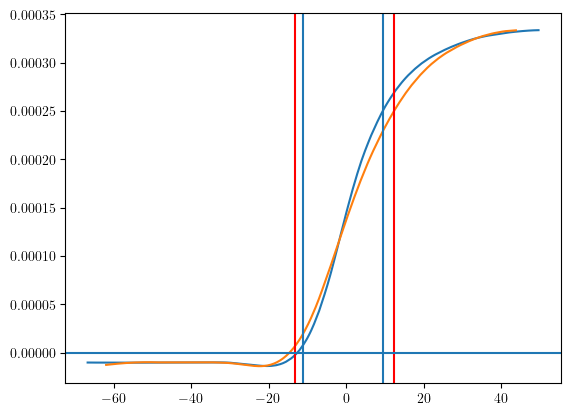

In [12]:
plt.plot(df_curve["V_smooth"], df_curve["I_smooth"])
plt.plot(df_second_curve["V_smooth"], df_second_curve["I_smooth"])
plt.axvline(vf)
plt.axvline(vp)
plt.axvline(vf2, color = "r")
plt.axvline(vp2, color = "r")
plt.axhline(0)
plt.show()

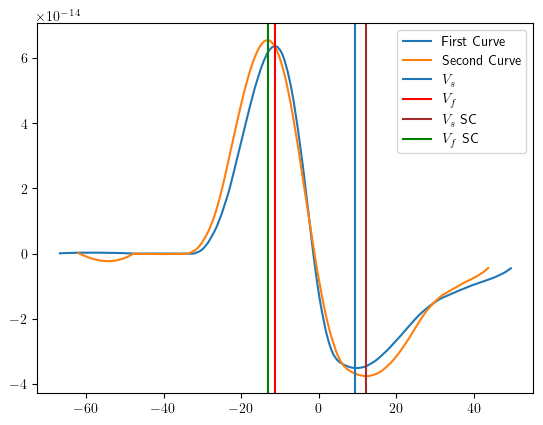

In [13]:
plt.plot(df_curve["V_smooth"] , df_curve["di_smooth"],label = "First Curve")
plt.plot(df_second_curve["V_smooth"], df_second_curve["di_smooth"], label = "Second Curve")
plt.axvline(vp, label = '$V_s$')
plt.axvline(vf, color = "red", label = "$V_f$")
plt.axvline(vp2, color = "brown",label = '$V_s$ SC')
plt.axvline(vf2, color = "green", label = "$V_f$ SC")
plt.legend()
plt.show()

# Adjusting the langmuir curve

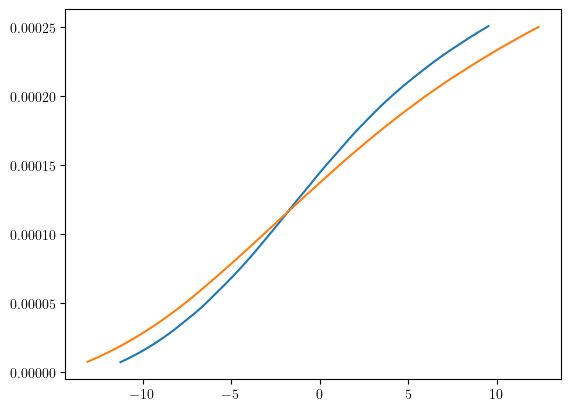

In [14]:
df = df_curve[(df_curve["V_smooth"] > vf) & (df_curve["V_smooth"] < vp)] ### Sets a new dataframe with the interval of analysis
df_second = df_second_curve[(df_second_curve["V_smooth"] > vf2) & (df_second_curve["V_smooth"] < vp2)]
plt.plot(df["V_smooth"],df["I_smooth"])
plt.plot(df_second["V_smooth"],df_second["I_smooth"])
plt.show()

In [15]:
df["I_e"] = df["I_smooth"]-df_curve["I_smooth"].min()
df_second["I_e"] = df_second["I_smooth"]-df_second_curve["I_smooth"].min()
df.head()

C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_5328\1196279736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["I_e"] = df["I_smooth"]-df_curve["I_smooth"].min()
C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_5328\1196279736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_second["I_e"] = df_second["I_smooth"]-df_second_curve["I_smooth"].min()


,Time(s),CH1(V),CH2(V),I,I_compesated,I_smooth,V_smooth,di_smooth,I_e
263565,-0.023643,9.515552,-11.74479,-0.0002498891,0.0002498891,0.0002508439,9.5250466093,-3.5170593705e-14,0.0002644953
263566,-0.023643,9.515552,-11.97508,-0.0002547889,0.0002547889,0.0002508417,9.5247516721,-3.5170464069e-14,0.0002644931
263567,-0.023643,9.515552,-11.74479,-0.0002498891,0.0002498891,0.0002508396,9.5244912174,-3.5170599401e-14,0.0002644910
263568,-0.023643,9.515552,-11.74479,-0.0002498891,0.0002498891,0.0002508374,9.5241962887,-3.5170469397e-14,0.0002644888
263569,-0.023643,9.515552,-11.97508,-0.0002547889,0.0002547889,0.0002508352,9.5239013642,-3.5170339209e-14,0.0002644866


In [16]:
df_te = df.copy()
df_te_second = df_second.copy()
df_te.head(), df_te.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81288 entries, 263565 to 344852
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time(s)       81288 non-null  float64
 1   CH1(V)        81288 non-null  float64
 2   CH2(V)        81288 non-null  float64
 3   I             81288 non-null  float64
 4   I_compesated  81288 non-null  float64
 5   I_smooth      81288 non-null  float64
 6   V_smooth      81288 non-null  float64
 7   di_smooth     81288 non-null  float64
 8   I_e           81288 non-null  float64
dtypes: float64(9)
memory usage: 6.2 MB


(         Time(s)    CH1(V)    CH2(V)             I  I_compesated  \
 263565 -0.023643  9.515552 -11.74479 -0.0002498891  0.0002498891   
 263566 -0.023643  9.515552 -11.97508 -0.0002547889  0.0002547889   
 263567 -0.023643  9.515552 -11.74479 -0.0002498891  0.0002498891   
 263568 -0.023643  9.515552 -11.74479 -0.0002498891  0.0002498891   
 263569 -0.023643  9.515552 -11.97508 -0.0002547889  0.0002547889   
 
             I_smooth      V_smooth         di_smooth           I_e  
 263565  0.0002508439  9.5250466093 -3.5170593705e-14  0.0002644953  
 263566  0.0002508417  9.5247516721 -3.5170464069e-14  0.0002644931  
 263567  0.0002508396  9.5244912174 -3.5170599401e-14  0.0002644910  
 263568  0.0002508374  9.5241962887 -3.5170469397e-14  0.0002644888  
 263569  0.0002508352  9.5239013642 -3.5170339209e-14  0.0002644866  ,
 None)

In [17]:
slope, intercept, r_value, p_value, std_err =sp.stats.linregress(df_te["V_smooth"], np.log(abs(df_te["I_e"])))
slope_second, intercept_second, r_value_second, p_value_second, std_err_second =sp.stats.linregress(df_te_second["V_smooth"], np.log(abs(df_te_second["I_e"])))

Te_fit = 1 / slope   # Te em eV se V em volts
Te_fit_second = 1 / slope_second  

In [18]:
Te_fit, np.exp(intercept)

(np.float64(8.63485925886037), np.float64(0.00012944374533325367))

In [19]:
Te_fit_second, np.exp(intercept_second)

(np.float64(10.989982210171421), np.float64(0.00012243932088409505))

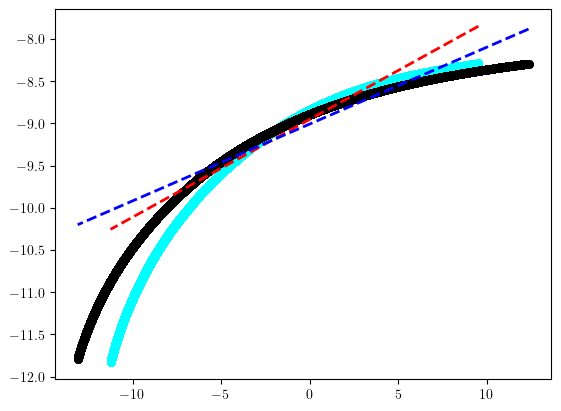

In [20]:
plt.scatter(df_te["V_smooth"],np.log(abs(df_te["I_smooth"])), lw = 0.01, color = "cyan" )
plt.plot(df_te["V_smooth"],intercept + slope*df_te["V_smooth"], lw = 2, ls = "--", color = "red")
plt.scatter(df_te_second["V_smooth"],np.log(abs(df_te_second["I_smooth"])), lw = 0.01, color = "black" )
plt.plot(df_te_second["V_smooth"], intercept_second + slope_second*df_te_second["V_smooth"], lw = 2, ls = "--", color = "blue")
plt.show()

In [21]:
### Calculo da densidade eletrônica

##Constantes
e = 1.602e-19  # C
kB = 1.381e-23  # J/K
me = 9.109e-31  # kg

#### Parâmetros
r = 0.25e-3
L = 15e-3
A = 2*np.pi*L*r

####
Te_K = Te_fit * 11604
Te_K_sec = Te_fit_second * 11604
# Calcular velocidade térmica equivalente
vth = np.sqrt(kB * Te_K / (2 * np.pi * me))
vth_sec = np.sqrt(kB * Te_K_sec / (2 * np.pi * me))
# Calcular densidade eletrônica
ne_m3 = np.exp(intercept) / (e * A * vth)
ne_cm3 = ne_m3 * 1e-6

ne_m3_sec = np.exp(intercept_second) / (e * A * vth)
ne_cm3_sec = ne_m3_sec * 1e-6

In [22]:
vp,vp2

(np.float64(9.525307075745323), np.float64(12.357534243889651))

In [23]:
vf,vf2

(np.float64(-11.257051282406364), np.float64(-13.11481779836263))

In [24]:
Te_fit, Te_fit_second

(np.float64(8.63485925886037), np.float64(10.989982210171421))

In [25]:
np.exp(intercept), np.exp(intercept_second)

(np.float64(0.00012944374533325367), np.float64(0.00012243932088409505))

In [26]:
ne_cm3, ne_cm3_sec

(np.float64(69743602.54508236), np.float64(65969655.850466155))

In [27]:
data = np.array([
    65086414.74,
    64610369.19,
    64603109.83,
    65428687.73,
    73900940.74,
    69743602.54508236
])

In [28]:
data2 = np.array([0.5, 1, 1.5, 2, 2.5, -7])

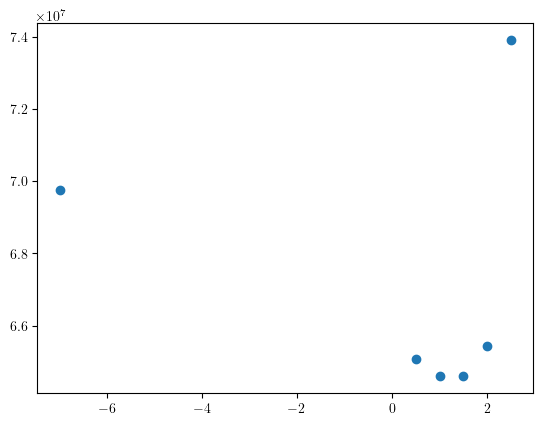

In [30]:
plt.scatter(data2,data)
plt.show()